Build a predictive model to determine the
likelihood of survival for passengers on
the Titanic using data science techniques
in Python.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [161]:
titanic=pd.read_csv('/content/train.csv')

In [162]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
titanic.shape

(891, 12)

In [164]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
#check for missing values
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [166]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

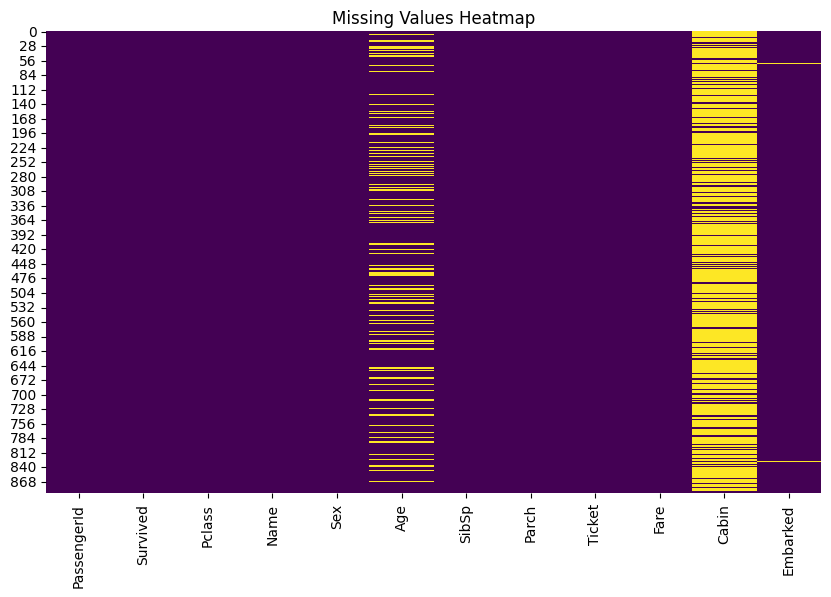

In [167]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [168]:
# Fill missing values for 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [169]:
# Fill missing values for 'Embarked' with the most common port
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [170]:
# Drop the 'Cabin' column as it has too many missing values
titanic.drop(columns=['Cabin'], inplace=True)

In [171]:
# Drop columns that won't be used
titanic.drop(columns=[ 'Name', 'Ticket',], inplace=True)
titanic = titanic.dropna(subset=['Age'])

In [172]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [173]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [174]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

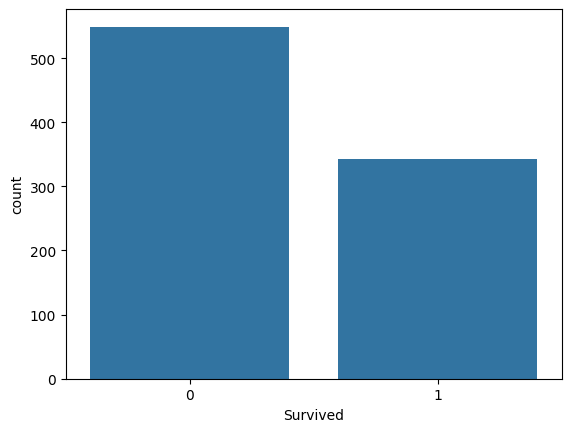

In [175]:
#how many people survuved-0  and how many did not-1
sns.countplot(x='Survived',data=titanic)

In [176]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [177]:
titanic.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: xlabel='Pclass', ylabel='Survived'>

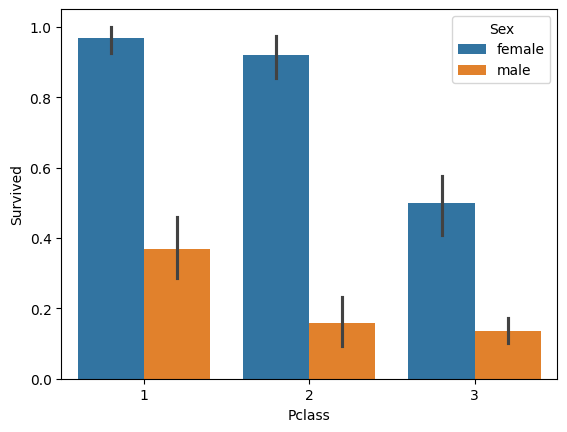

In [178]:
#survival rate(on basic of sex and pclass)
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic)

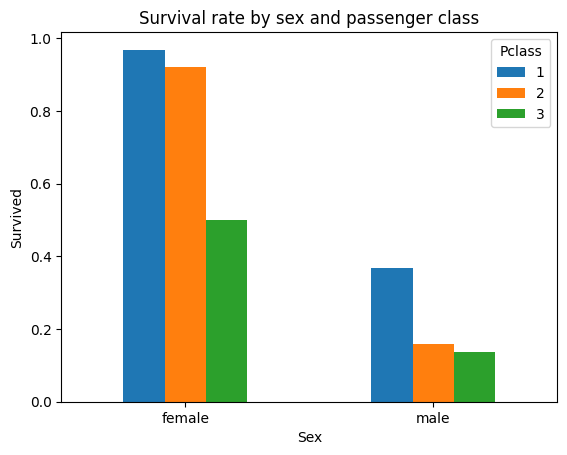

In [179]:
titanic['Sex']=titanic['Sex'].astype('category')
pivot_table=titanic.pivot_table('Survived',index='Sex',columns='Pclass')

pivot_table.plot(kind= 'bar')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Survival rate by sex and passenger class')
plt.legend(title='Pclass')
plt.xticks(rotation=0)
plt.show()

In [180]:
age=pd.cut(titanic['Age'],[0,18,80])
titanic.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

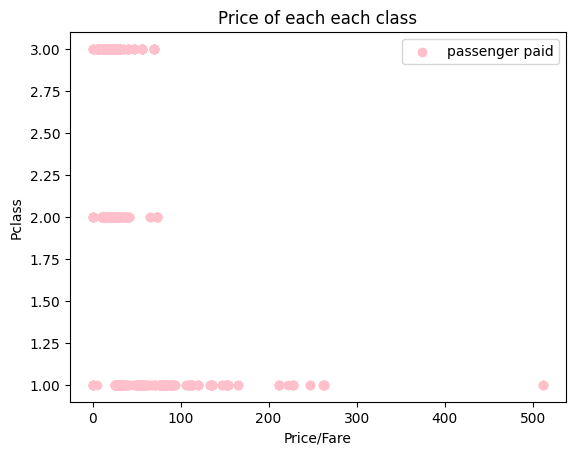

In [181]:
plt.scatter(titanic['Fare'],titanic['Pclass'],color='pink',label='passenger paid')
plt.ylabel('Pclass')
plt.xlabel('Price/Fare')
plt.title('Price of each each class')
plt.legend()
plt.show()

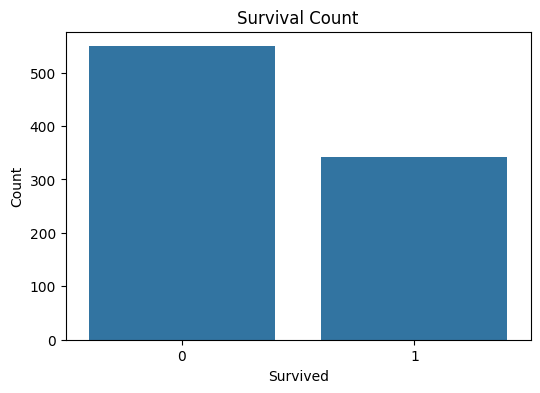

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [182]:
# Survival rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

# Percentage of survival
survival_rate = titanic['Survived'].value_counts(normalize=True) * 100
print(survival_rate)


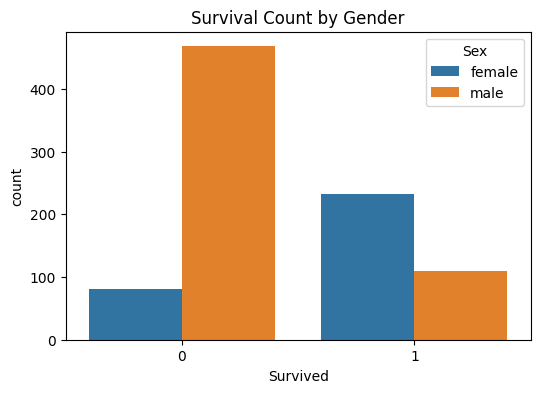

In [183]:
# Survival rate by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival Count by Gender')
plt.show()


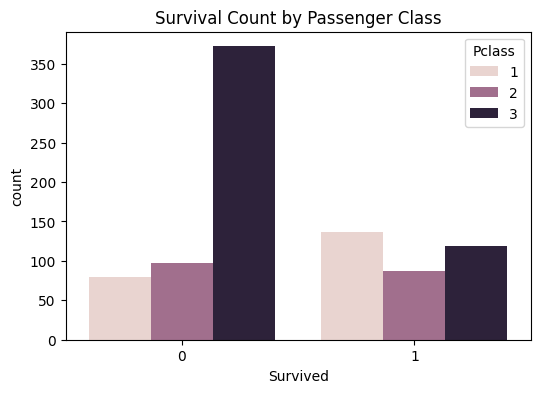

In [184]:
# Survival rate by passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.show()


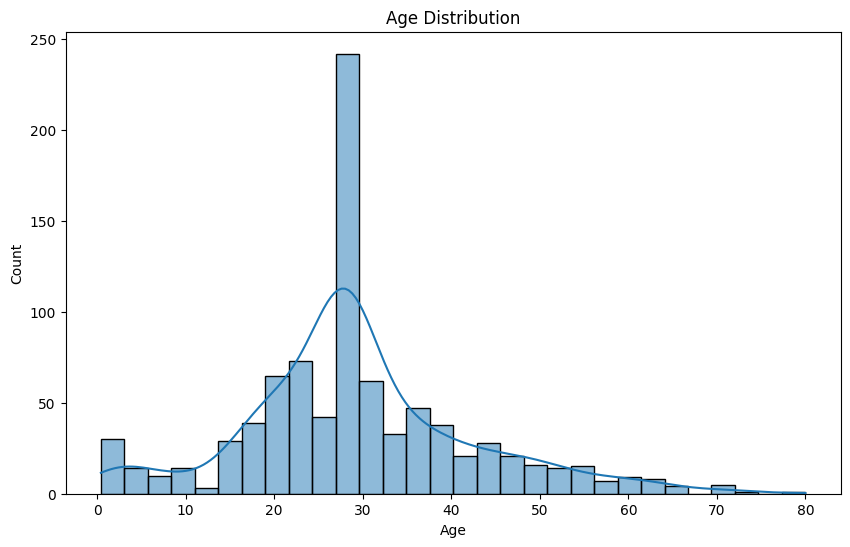

In [185]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

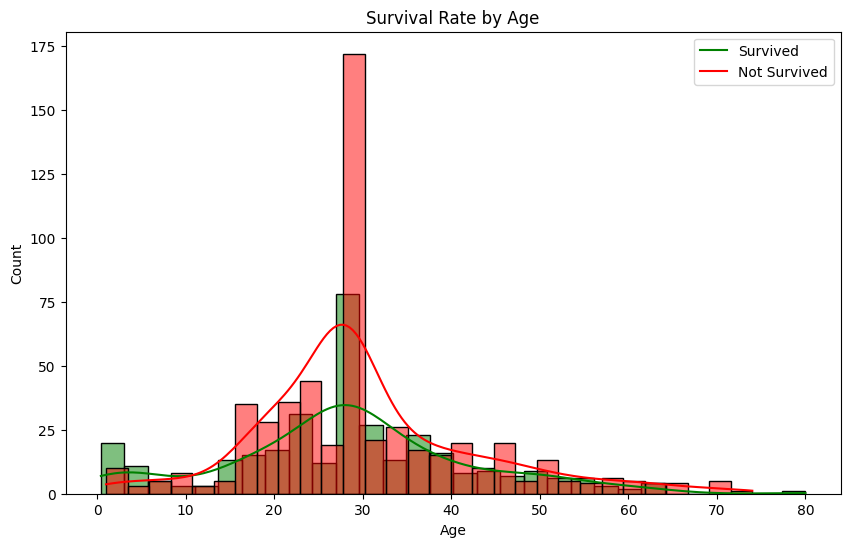

In [202]:
# Survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(titanic[titanic['Survived'] == 1]['Age'].dropna(), kde=True, color='green', bins=30)
sns.histplot(titanic[titanic['Survived'] == 0]['Age'].dropna(), kde=True, color='red', bins=30)
plt.title('Survival Rate by Age')
plt.legend(['Survived', 'Not Survived'])
plt.show()

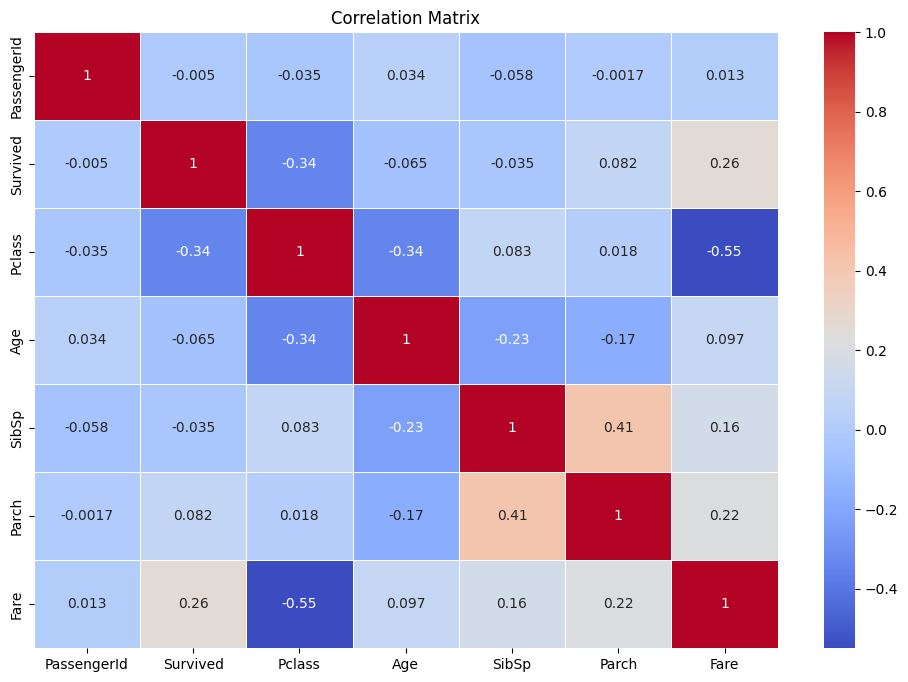

In [187]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation calculation
numerical_titanic = titanic.select_dtypes(include=['number'])
correlation_matrix = numerical_titanic.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

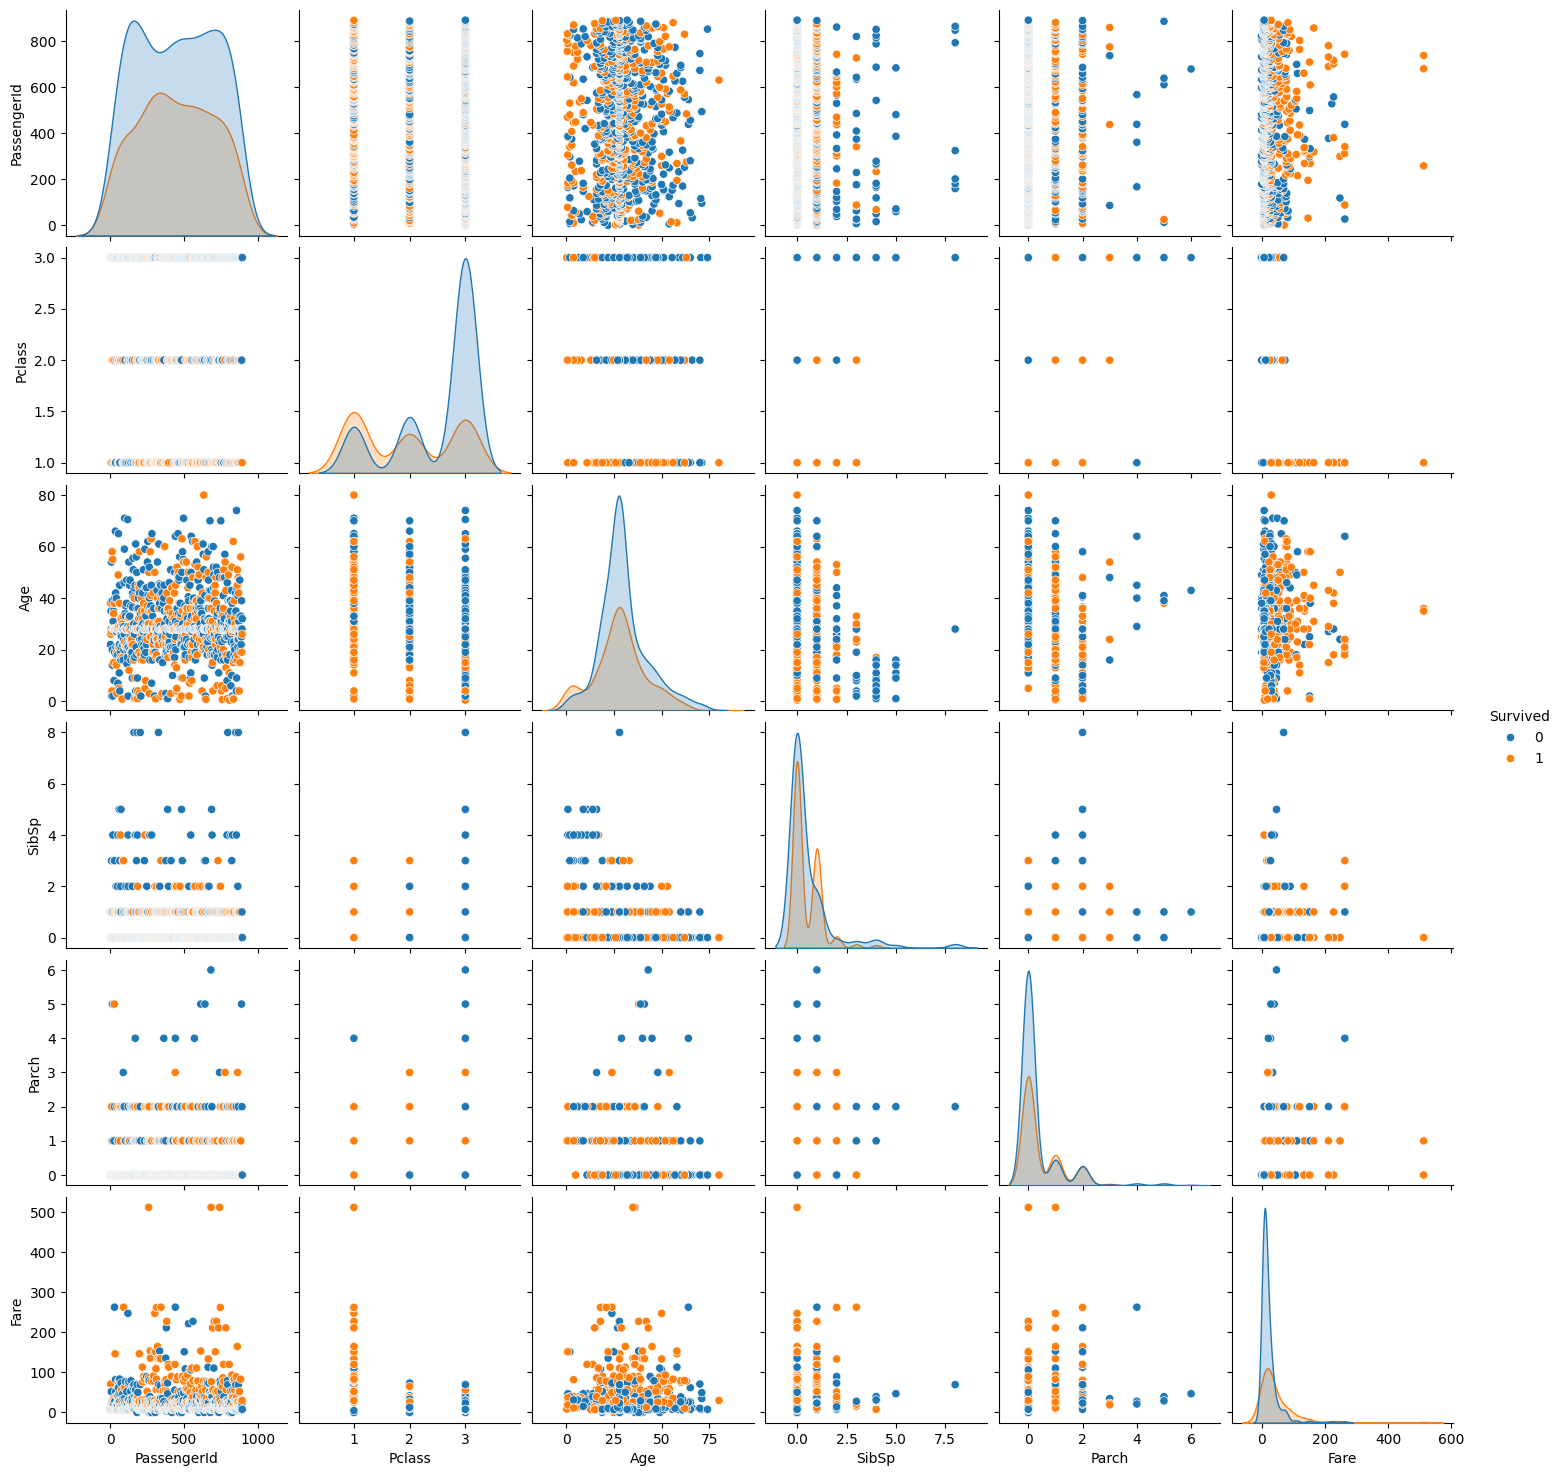

In [188]:
# Pairplot
sns.pairplot(titanic, hue='Survived', diag_kind='kde')
plt.show()

In [189]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#print(titanic.shape[1])

titanic.iloc[:,3] = labelencoder.fit_transform(titanic.iloc[:,3].values)

titanic.iloc[:,8] = labelencoder.fit_transform(titanic.iloc[:,8].values)

print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


In [190]:
x = titanic.iloc[:, 1:8].values
y = titanic.iloc[:, 0].values

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [192]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [193]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [194]:
print('Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))


Random Forest Classifier Training Accuracy: 0.8665730337078652


In [196]:
pred = forest.predict(x_test)
print(pred)
print()
print(x_test)
print()
print(y_test)

[498 469 788 335  67 608 338 538 691  20 443 866 460 238 642 817  81 103
   5 752 758 307 630 794 883 582 131 290  99 120 770 527 356  24 372 448
 846 243 344 696 125 786 498  51 487 336 336 743 796 746 508  24 324 647
 508 121 556 542 183  49 297 255 592 603 824 750 863 386 324 137 427 622
 476 465  90  42 119 332 844 563 452 349  42 676 706 291 338 798 577 749
 634 647 341 541 814 833 418  51 556 608  60 100 144 533 424 329 304 886
 362 242 397 167  75 416 249 444 618 292 109 802 693 585 837 807 770 493
  27 108 675 627 422  13 885 403 457  13  47 105 218 735 887 487 465 776
 711 817 179 519 269 585 246 287 535 423 346 235 273 227 503 470 336 128
 578 560 533 704 130  52 754 164 483 367 471 498 876 465 487 754 284]

[[-0.788586    0.81925059  0.72882288 ... -0.46445234 -0.47741019
  -0.34739758]
 [-0.788586    0.81925059  0.72882288 ... -0.46445234 -0.47741019
  -0.48528755]
 [-0.788586    0.81925059  0.72882288 ...  3.04419557  0.74092692
  -0.0546496 ]
 ...
 [ 1.26809251 -1.5811873

In [198]:
my_survival = [[3,1,21,0, 0, 0, 1]]
#Print Prediction of Random Forest Classifier model
pred = forest.predict(my_survival)
print(pred)

if pred == 0:
    print("Oh no! You didn't make it")
else:
    print('Nice! You survived')


[337]
Nice! You survived
